In [1]:
import os
from keras.models import Sequential
from keras.layers import Dense, add, Activation, MaxPooling2D, Conv2D, Dropout, Flatten
from keras.utils import np_utils
import numpy as np
import matplotlib.image as mpimg
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
path_aircraft = r"C:\\Users\\Lokesh Vairamuthu\\Desktop\\Machine_Learning Datasets\\Natural Images Classification\\natural-images\\natural_images\\airplane"
path_car = r"C:\\Users\\Lokesh Vairamuthu\\Desktop\\Machine_Learning Datasets\\Natural Images Classification\\natural-images\\natural_images\\car"
path_cat = r"C:\\Users\\Lokesh Vairamuthu\\Desktop\\Machine_Learning Datasets\\Natural Images Classification\\natural-images\\natural_images\\cat"
path_dog = r"C:\\Users\\Lokesh Vairamuthu\\Desktop\\Machine_Learning Datasets\\Natural Images Classification\\natural-images\\natural_images\\dog"
path_flower = r"C:\\Users\\Lokesh Vairamuthu\\Desktop\\Machine_Learning Datasets\\Natural Images Classification\\natural-images\\natural_images\\flower"
path_fruit = r"C:\\Users\\Lokesh Vairamuthu\\Desktop\\Machine_Learning Datasets\\Natural Images Classification\\natural-images\\natural_images\\fruit"
path_motorbike = r"C:\\Users\\Lokesh Vairamuthu\\Desktop\\Machine_Learning Datasets\\Natural Images Classification\\natural-images\\natural_images\\motorbike"
path_person = r"C:\\Users\\Lokesh Vairamuthu\\Desktop\\Machine_Learning Datasets\\Natural Images Classification\\natural-images\\natural_images\\person"

aircraft = os.listdir(path_aircraft)
car = os.listdir(path_car)
cat = os.listdir(path_cat)
dog = os.listdir(path_dog)
flower = os.listdir(path_flower)
fruit = os.listdir(path_fruit)
motorbike = os.listdir(path_motorbike)
person = os.listdir(path_person)

aircraft_img_path = aircraft
car_img_path = car
cat_img_path = cat
dog_img_path = dog
flower_img_path = flower
fruit_img_path = fruit
motorbike_img_path = motorbike
person_img_path = person

len_aircraft = len(aircraft)
len_car = len(car)
len_cat = len(cat)
len_dog = len(dog)
len_flower = len(flower)
len_fruit = len(fruit)
len_motorbike = len(motorbike)
len_person = len(person)

for i in range(0,len_aircraft):
    aircraft_img_path[i] = os.path.abspath(os.path.join(path_aircraft,aircraft[i]))
for i in range(0,len_car):
    car_img_path[i] = os.path.abspath(os.path.join(path_car,car[i]))
for i in range(0,len_cat):
    cat_img_path[i] = os.path.abspath(os.path.join(path_cat,cat[i]))
for i in range(0,len_dog):
    dog_img_path[i] = os.path.abspath(os.path.join(path_dog,dog[i]))
for i in range(0,len_flower):
    flower_img_path[i] = os.path.abspath(os.path.join(path_flower,flower[i]))
for i in range(0,len_fruit):
    fruit_img_path[i] = os.path.abspath(os.path.join(path_fruit,fruit[i]))
for i in range(0,len_motorbike):
    motorbike_img_path[i] = os.path.abspath(os.path.join(path_motorbike,motorbike[i]))
for i in range(0,len_person):
    person_img_path[i] = os.path.abspath(os.path.join(path_person,person[i]))

In [3]:
img_aircraft = np.zeros([727,64,64,3])
for i in range(0,len_aircraft):
    aa = mpimg.imread(aircraft_img_path[i])
    img_aircraft[i] = np.resize(aa,(64,64,3))
    
img_car = np.zeros([968,64,64,3])
for i in range(0,len_car):
    bb = mpimg.imread(car_img_path[i])
    img_car[i] = np.resize(bb,(64,64,3))

img_cat = np.zeros([885,64,64,3])
for i in range(0,len_cat):
    cc = mpimg.imread(cat_img_path[i])
    img_cat[i] = np.resize(cc,(64,64,3))
    
img_dog = np.zeros([702,64,64,3])
for i in range(0,len_dog):
    dd = mpimg.imread(dog_img_path[i])
    img_dog[i] = np.resize(dd,(64,64,3))
    
img_flower = np.zeros([843,64,64,3])
for i in range(0,len_flower):
    ee = mpimg.imread(flower_img_path[i])
    img_flower[i] = np.resize(ee,(64,64,3))
    
img_fruit = np.zeros([1000,64,64,3])
for i in range(0,len_fruit):
    ff = mpimg.imread(fruit_img_path[i])
    img_fruit[i] = np.resize(ff,(64,64,3))
    
img_motorbike = np.zeros([788,64,64,3])
for i in range(0,len_motorbike):
    gg = mpimg.imread(motorbike_img_path[i])
    img_motorbike[i] = np.resize(gg,(64,64,3))
    
img_person = np.zeros([986,64,64,3])
for i in range(0,len_person):
    hh = mpimg.imread(person_img_path[i])
    img_person[i] = np.resize(hh,(64,64,3))

In [4]:
X = np.concatenate((img_aircraft, img_car), axis=0)
X = np.concatenate((X, img_cat), axis=0)
X = np.concatenate((X, img_dog), axis=0)
X = np.concatenate((X, img_flower), axis=0)
X = np.concatenate((X, img_fruit), axis=0)
X = np.concatenate((X, img_motorbike), axis=0)
X = np.concatenate((X, img_person), axis=0)

In [5]:
y1 = np.chararray((727,1), itemsize=8)
y1[:] = 'aircraft'
y2 = np.chararray((968,1), itemsize=3)
y2[:] = 'car'
y3 = np.chararray((885,1), itemsize=3)
y3[:] = 'cat'
y4 = np.chararray((702,1), itemsize=3)
y4[:] = 'dog'
y5 = np.chararray((843,1), itemsize=6)
y5[:] = 'flower'
y6 = np.chararray((1000,1), itemsize=5)
y6[:] = 'fruit'
y7 = np.chararray((788,1), itemsize=9)
y7[:] = 'motorbike'
y8 = np.chararray((986,1), itemsize=6)
y8[:] = 'person'

In [6]:
y = np.concatenate((y1, y2), axis=0)
y = np.concatenate((y, y3), axis=0)
y = np.concatenate((y, y4), axis=0)
y = np.concatenate((y, y5), axis=0)
y = np.concatenate((y, y6), axis=0)
y = np.concatenate((y, y7), axis=0)
y = np.concatenate((y, y8), axis=0)

In [7]:
encoder = LabelEncoder()
encoder.fit_transform(y)
y_encoded = encoder.transform(y)

y_dummy = np_utils.to_categorical(y_encoded)

C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lokesh Vairamuthu\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y_dummy, test_size=0.23, random_state=42)

In [9]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(64,64,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="sigmoid"))

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
H1 = model.fit(X_train, y_train, epochs=100, batch_size=100, verbose=1)

Epoch 1/100
5312/5312 [==============================] - 33s 6ms/step - loss: 1.1410 - acc: 0.7327
Epoch 2/100
5312/5312 [==============================] - 32s 6ms/step - loss: 0.5209 - acc: 0.7940
Epoch 3/100
5312/5312 [==============================] - 33s 6ms/step - loss: 0.4428 - acc: 0.8394
Epoch 4/100
5312/5312 [==============================] - 32s 6ms/step - loss: 0.3942 - acc: 0.8587
Epoch 5/100
5312/5312 [==============================] - 31s 6ms/step - loss: 0.3669 - acc: 0.8704
Epoch 6/100
5312/5312 [==============================] - 31s 6ms/step - loss: 0.3490 - acc: 0.8772
Epoch 7/100
5312/5312 [==============================] - 31s 6ms/step - loss: 0.3243 - acc: 0.8843
Epoch 8/100
5312/5312 [==============================] - 31s 6ms/step - loss: 0.3117 - acc: 0.8887
Epoch 9/100
5312/5312 [==============================] - 31s 6ms/step - loss: 0.2989 - acc: 0.8903
Epoch 10/100
5312/5312 [==============================] - 31s 6ms/step - loss: 0.2803 - acc: 0.8967
Epoch 11/

5312/5312 [==============================] - 30s 6ms/step - loss: 0.0441 - acc: 0.9848
Epoch 84/100
5312/5312 [==============================] - 30s 6ms/step - loss: 0.0467 - acc: 0.9853
Epoch 85/100
5312/5312 [==============================] - 30s 6ms/step - loss: 0.0474 - acc: 0.9850
Epoch 86/100
5312/5312 [==============================] - 31s 6ms/step - loss: 0.0431 - acc: 0.9863
Epoch 87/100
5312/5312 [==============================] - 30s 6ms/step - loss: 0.0406 - acc: 0.9871
Epoch 88/100
5312/5312 [==============================] - 31s 6ms/step - loss: 0.0419 - acc: 0.9867
Epoch 89/100
5312/5312 [==============================] - 30s 6ms/step - loss: 0.0426 - acc: 0.9853
Epoch 90/100
5312/5312 [==============================] - 30s 6ms/step - loss: 0.0451 - acc: 0.9847
Epoch 91/100
5312/5312 [==============================] - 30s 6ms/step - loss: 0.0394 - acc: 0.9881
Epoch 92/100
5312/5312 [==============================] - 30s 6ms/step - loss: 0.0369 - acc: 0.9881
Epoch 93/100


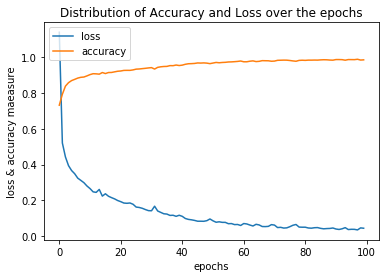

In [14]:
print(H1.history.keys())

plt.plot(H1.history["loss"])
plt.plot(H1.history["acc"])
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.xlabel("epochs")
plt.ylabel("loss & accuracy maeasure")
plt.title("Distribution of Accuracy and Loss over the epochs")
plt.show()

In [17]:
score = model.evaluate(X_test, y_test, verbose=1)
print("The score loss of test model is %f" %(score[0]))
print("The score accuracy of test model is %f" %(score[1]*100))

1587/1587 [==============================] - 4s 3ms/step


[0.3325441081004092, 0.9194234404912442]

In [22]:
y_pred = model.predict(X_test,  batch_size=100, verbose=1)
print("The accuracy of the predicted model using the deep learning multi class classification is %f" %(100-np.mean(np.abs(y_pred - y_test)))+'%')

1587/1587 [==============================] - 4s 3ms/step
The accuracy of the predicted model using the deep learning multi class classification is 99.910486%


In [29]:
y_pred[3], y_test[3]

(array([1.1450356e-10, 1.1365213e-14, 1.6954382e-05, 1.7440944e-09,
        7.1593172e-06, 1.3819704e-09, 9.3916174e-17, 9.9746692e-01],
       dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))